In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import torchvision.models as models

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler



In [2]:
# Check pyTorch version
torch.__version__

'2.2.2'

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using: {device}")

Using: cpu


In [4]:
datapath= "/Users/niraj/Desktop/ML-Cognitive-Science/test/Final_data.csv"
# Defining save path for figures that will be generated later
save_path = r'/Users/niraj/Desktop/ML-Cognitive-Science/Figures/'

In [5]:
df = pd.read_csv(datapath)

In [6]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [7]:
df.head()

Target participant          Exp        Condition          item  \
0  butterfly  A1_E12_Y34  PrePost_Mod     Pre-modified  R15_Aim1_i37   
1    mermaid  A1_E12_Y34  PrePost_Mod  Unmodified_Post  R15_Aim1_i16   
2     runner  A1_E12_Y34  PrePost_Mod   Unmodified_Pre  R15_Aim1_i46   
3      sword  A1_E12_Y34  PrePost_Mod   Unmodified_Pre  R15_Aim1_i38   
4        fly  A1_E12_Y34  PrePost_Mod  Unmodified_Post  R15_Aim1_i24   

                                            Sentence  WordNum    Age  \
0  It was the pretty, shimmering blue butterfly t...       15  Young   
1  The folk tale said that it was the mermaid tha...       19  Young   
2  I heard that it was the runner that the mentor...       16  Young   
3  I couldn't believe that it was a sword that th...       16  Young   
4  She could not guess that it was the fly that t...       17  Young   

   TargetPos          Verb  VerbPos     CQ_Type       w_1       w_2       w_3  \
0          7  photographed       11         NaN  2.043582  0.399983  0.566369   
1          9       trapped       13  Dependency  8.630846  0.516957  0.349751   
2          7       trained       11         NaN  1.681664  0.400842  0.366426   
3          8     swallowed       12     General  0.313546  0.350083  0.449946   
4          9        caught       13     General  0.515149  0.300143  0.299787   

        w_4       w_5       w_6       w_7       w_8       w_9      w_10  \
0  0.433314  0.467180  0.516204  0.399971  0.366804  0.533295  0.399932   
1  0.366940  0.283343  0.333261  0.316737  0.299669  0.300390  0.266290   
2  0.266026  0.283635  0.283253  0.316628  0.300221  0.283160  0.316621   
3  0.450850  0.382726  0.582942  0.300276  0.283303  0.300086  0.366320   
4  0.333482  0.400247  0.482825  0.400239  0.299997  0.266708  0.383099   

       w_11      w_12      w_13      w_14      w_15      w_16      w_17  \
0  0.334056  0.283900  0.315596  0.299949  0.250021       NaN       NaN   
1  0.300038  0.266773  0.233593  0.232916  0.350182  0.266723  0.283599   
2  0.333436  0.466473  0.366837  0.283342  0.316617  0.233333       NaN   
3  0.283605  0.300210  0.283182  0.299796  0.283672  0.399858       NaN   
4  0.316643  0.283746  0.349857  0.333528  0.349656  0.266792  0.283290   

       w_18      w_19  w_20  Average_Reading_time  Reading_time_on_target  \
0       NaN       NaN   NaN              0.507344                0.399971   
1  0.266592  0.266473   NaN              0.743741                0.300390   
2       NaN       NaN   NaN              0.406157                0.316628   
3       NaN       NaN   NaN              0.351900                0.283303   
4       NaN       NaN   NaN              0.345011                0.266708   

   Response_Recorded.corr  Response_Recorded.rt  Target_Mem     Item_t  \
0                       0                   NaN         NaN  butterfly   
1                       1              2.282060         NaN    mermaid   
2                       0                   NaN         NaN     runner   
3                       1              2.732796         NaN      sword   
4                       1              4.563811         NaN        fly   

    Item_p     Item_u       Item_s     Item_c                 expName  \
0  clutter  barricade  hummingbird  passenger  Aim1_Final_ToRun_List2   
1     raid       book        fairy     sailor  Aim1_Final_ToRun_List2   
2    wrens      tower       winner     mentor  Aim1_Final_ToRun_List2   
3     seed   manifold        knife   magician  Aim1_Final_ToRun_List2   
4    floor    cracker       insect     spider  Aim1_Final_ToRun_List2   

   Item_t_Memory_trials.thisN  Item_t_Memory_trials.thisIndex  \
0                         258                              36   
1                          26                              15   
2                         195                              45   
3                          66                              37   
4                         160                              23   

   Item_t_Mem

In [8]:
df = df[["Age","Average_Reading_time","Reading_time_on_target","Item_t_MemoryTestResp.rt","Item_t_MemoryTestResp.corr","Item_s_MemoryTestResp.rt","Item_s_MemoryTestResp.corr"]]

In [9]:
df.head()

Age  Average_Reading_time  Reading_time_on_target  \
0  Young              0.507344                0.399971   
1  Young              0.743741                0.300390   
2  Young              0.406157                0.316628   
3  Young              0.351900                0.283303   
4  Young              0.345011                0.266708   

   Item_t_MemoryTestResp.rt  Item_t_MemoryTestResp.corr  \
0                  0.782505                           1   
1                  0.875974                           1   
2                  1.088317                           1   
3                  0.852112                           1   
4                  1.218718                           1   

   Item_s_MemoryTestResp.rt  Item_s_MemoryTestResp.corr  
0                  0.867199                           1  
1                  2.142522                           0  
2                  0.754723                           1  
3                  1.957806                           0  
4                  3.170142                           1

In [10]:
df['Age'] = df['Age'].map({'Young': 0, 'Old': 1})

In [11]:
df.head()

Age  Average_Reading_time  Reading_time_on_target  \
0    0              0.507344                0.399971   
1    0              0.743741                0.300390   
2    0              0.406157                0.316628   
3    0              0.351900                0.283303   
4    0              0.345011                0.266708   

   Item_t_MemoryTestResp.rt  Item_t_MemoryTestResp.corr  \
0                  0.782505                           1   
1                  0.875974                           1   
2                  1.088317                           1   
3                  0.852112                           1   
4                  1.218718                           1   

   Item_s_MemoryTestResp.rt  Item_s_MemoryTestResp.corr  
0                  0.867199                           1  
1                  2.142522                           0  
2                  0.754723                           1  
3                  1.957806                           0  
4                  3.170142                           1

In [12]:
df.isnull()

Age  Average_Reading_time  Reading_time_on_target  \
0     False                 False                   False   
1     False                 False                   False   
2     False                 False                   False   
3     False                 False                   False   
4     False                 False                   False   
5     False                 False                   False   
6     False                 False                   False   
7     False                 False                   False   
8     False                 False                   False   
9     False                 False                   False   
10    False                 False                   False   
11    False                 False                   False   
12    False                 False                   False   
13    False                 False                   False   
14    False                 False                   False   
15    False                 False                   False   
16    False                 False                   False   
17    False                 False                   False   
18    False                 False                   False   
19    False                 False                   False   
20    False                 False                   False   
21    False                 False                   False   
22    False                 False                   False   
23    False                 False                   False   
24    False                 False                   False   
25    False                 False                   False   
26    False                 False                   False   
27    False                 False                   False   
28    False                 False                   False   
29    False                 False                   False   
30    False                 False                   False   
31    False                 False                   False   
32    False                 False                   False   
33    False                 False                   False   
34    False                 False                   False   
35    False                 False                   False   
36    False                 False                   False   
37    False                 False                   False   
38    False                 False                   False   
39    False                 False                   False   
40    False                 False                   False   
41    False                 False                   False   
42    False                 False                   False   
43    False                 False                   False   
44    False                 False                   False   
45    False                 False                   False   
46    False                 False                   False   
47    False                 False                   False   
48    False                 False                   False   
49    False                 False                   False   
50    False                 False                   False   
51    False                 False                   False   
52    False                 False                   False   
53    False                 False                   False   
54    False                 False                   False   
55    False                 False                   False   
56    False                 False                   False   
57    False                 False                   False   
58    False                 False                   False   
59    False                 False                   False   
60    False                 False                   False   
61    False                 False                   False   
62    False                 False                   False   
63    False                 False                   False   
64    False                 False          

In [13]:
X = df.drop(["Item_t_MemoryTestResp.corr","Item_s_MemoryTestResp.corr"],axis = "columns")
X.head()

Age  Average_Reading_time  Reading_time_on_target  \
0    0              0.507344                0.399971   
1    0              0.743741                0.300390   
2    0              0.406157                0.316628   
3    0              0.351900                0.283303   
4    0              0.345011                0.266708   

   Item_t_MemoryTestResp.rt  Item_s_MemoryTestResp.rt  
0                  0.782505                  0.867199  
1                  0.875974                  2.142522  
2                  1.088317                  0.754723  
3                  0.852112                  1.957806  
4                  1.218718                  3.170142

In [14]:
# # Todo
# # remove anything that is higher than standard deviation of 2.5 for each column
# # mean+-(standard_deviation* 2.5)

# # if this doesn't work try this:
# # Median split the participants on their accuracy to comprehension questions (not memory questions)


# 1) just take General and Dependency from the CQ_type
# 2) select one person 
# 3) go to Response_recorded.corr and take average of one person.
# 4) make a new column "Accuray" and fill the all rows of the same person with the same accuracy score
# 4) there's gonna be many rows of the same person. Take Average of that person.
# 5) continue this same method for every person
# 6) take median of all person.
# 7) make new column "Higher_than_median" and "Lower than median"
# 8) give values 1 to those who is higher than median and 0 to those who is lower than median



In [15]:
X["Item_s_MemoryTestResp.rt"].median()

1.06573795

In [16]:
df.head()

Age  Average_Reading_time  Reading_time_on_target  \
0    0              0.507344                0.399971   
1    0              0.743741                0.300390   
2    0              0.406157                0.316628   
3    0              0.351900                0.283303   
4    0              0.345011                0.266708   

   Item_t_MemoryTestResp.rt  Item_t_MemoryTestResp.corr  \
0                  0.782505                           1   
1                  0.875974                           1   
2                  1.088317                           1   
3                  0.852112                           1   
4                  1.218718                           1   

   Item_s_MemoryTestResp.rt  Item_s_MemoryTestResp.corr  
0                  0.867199                           1  
1                  2.142522                           0  
2                  0.754723                           1  
3                  1.957806                           0  
4                  3.170142                           1

In [17]:

# y1 = df["Item_t_MemoryTestResp.corr"]
# y2 = df["Item_s_MemoryTestResp.corr"]
# print("This is the shape of y1 and y2: ",y1.shape,y2.shape)
# y= np.column_stack((y1,y2))
y = df[["Item_t_MemoryTestResp.corr","Item_s_MemoryTestResp.corr"]]


print("This is y shape: ",y.shape)
print("This is X shape: ",X.shape)


This is y shape:  (7260, 2)
This is X shape:  (7260, 5)


In [18]:
# # Splitting the datasets into train and test using 20% as test size

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape



In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

print("Shape of X_tensor and y_tensor: ",X_tensor.shape,y_tensor.shape)
                            
# Creating dataloader for training and testing purpose                           
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return len(self.X)

# Create an instance of the dataset
dataset = MyDataset(X_tensor, y_tensor)

# Define the split sizes. Let's assume 70% for training, 15% for validation, and 15% for testing
train_ratio = 0.70
valid_ratio = 0.15
test_ratio = 0.15

# Get the lengths of splits
total_size = len(dataset)
train_size = int(total_size * train_ratio)
valid_size = int(total_size * valid_ratio)
test_size = int(total_size * test_ratio)

# Split the dataset
train_dataset, valid_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])

# creating train, test and dev loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Shape of X_tensor and y_tensor:  torch.Size([7260, 5]) torch.Size([7260, 2])


In [20]:
len(train_dataset)


5082

In [45]:
# Making a dataframe to append the scores.
# Create an empty DataFrame with desired columns
table_df = pd.DataFrame(columns=["Model name", "Accuracy", "Precision", "Recall", "F1 Score"])

## Trying with RandomForest to check the accuracy

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape,y_train.shape)
rf_clf= RandomForestClassifier()

multi_target_clf = MultiOutputClassifier(estimator = rf_clf)

param_grid = {'estimator__n_estimators': range(1,100)}

# Using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(multi_target_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Printing the best parameters
print("Best parameters: ", grid_search.best_params_)

# Predicting the test set results
y_pred = grid_search.predict(X_test)

# Calculating the score
score = grid_search.score(X_test,y_test)
print("Score: ", score)

# Printing the Classification report to better analysis
print(classification_report(y_test,y_pred,zero_division=1))


(5808, 5) (5808, 2)
Best parameters:  {'estimator__n_estimators': 94}
Score:  0.4641873278236915
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       960
           1       0.73      0.92      0.81      1038

   micro avg       0.72      0.91      0.80      1998
   macro avg       0.72      0.90      0.80      1998
weighted avg       0.72      0.91      0.80      1998
 samples avg       0.73      0.91      0.78      1998



Training set (X_train): (5808, 5)
Test set (X_test): (1452, 5)
Accuracy: 0.4607438016528926


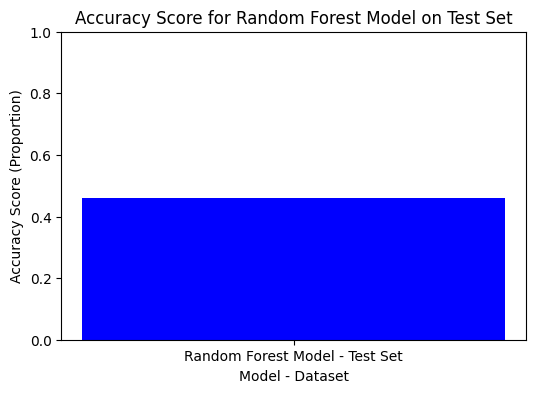

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       984
           1       0.72      0.90      0.80      1036

   micro avg       0.72      0.89      0.80      2020
   macro avg       0.72      0.89      0.80      2020
weighted avg       0.72      0.89      0.80      2020
 samples avg       0.72      0.89      0.77      2020



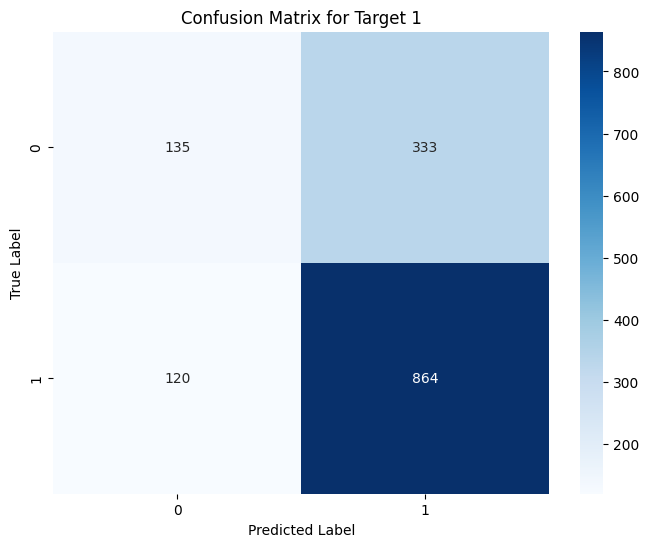

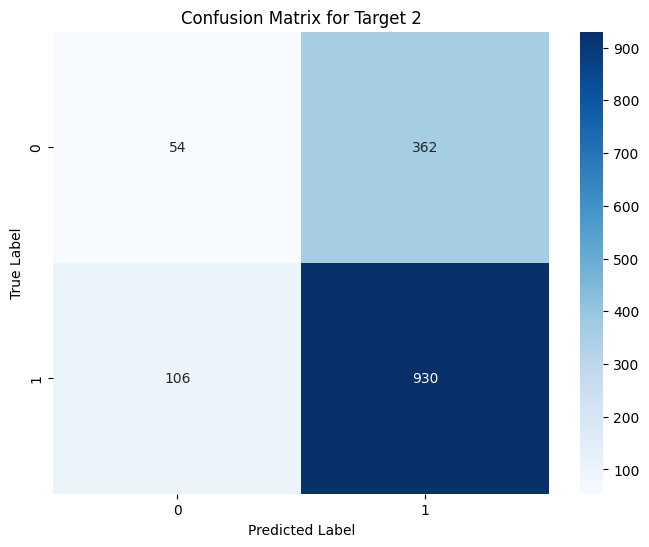

In [108]:


# Initialize the classifier
rf_clf = RandomForestClassifier(n_estimators=76)

# Split the datasets into train and test using 20% as test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print(f"Training set (X_train): {X_train.shape}")
print(f"Test set (X_test): {X_test.shape}")

# Initialize the multi-output classifier
multi_target_clf = MultiOutputClassifier(estimator=rf_clf)

# Fit the model with the training data
multi_target_clf.fit(X_train, y_train)

# Predict the test data
y_test_pred = multi_target_clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy}")

# Plot the accuracy
plt.figure(figsize=(6, 4))
plt.bar('Random Forest Model - Test Set', accuracy, color='blue')
plt.xlabel('Model - Dataset')
plt.ylabel('Accuracy Score (Proportion)')
plt.title('Accuracy Score for Random Forest Model on Test Set')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.savefig(save_path + 'Accuracy_RF')
plt.show()

# Calculate and print the classification report
class_report = classification_report(y_test, y_test_pred, zero_division=1)
print("Classification Report:")
print(class_report)

# Calculate the confusion matrices for the two targets
conf_matrix_target1 = confusion_matrix(y_test.iloc[:, 0], y_test_pred[:, 0])
conf_matrix_target2 = confusion_matrix(y_test.iloc[:, 1], y_test_pred[:, 1])

# Plot the confusion matrix for the first target
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_target1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Target 1')
plt.savefig(save_path + 'RF_CM_Target1')
plt.show()

# Plot the confusion matrix for the second target
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_target2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Target 2')
plt.savefig(save_path + 'RF_CM_Target2')
plt.show()

In [92]:
y_test.dtype, y_pred.dtype

(dtype('int64'), dtype('int64'))

Accuracy: 0.4703856749311295


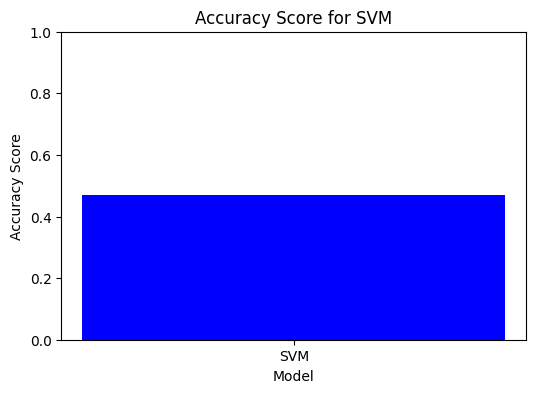

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.88      0.80       984
           1       0.73      0.91      0.81      1036

   micro avg       0.72      0.90      0.80      2020
   macro avg       0.72      0.90      0.80      2020
weighted avg       0.72      0.90      0.80      2020
 samples avg       0.72      0.90      0.78      2020



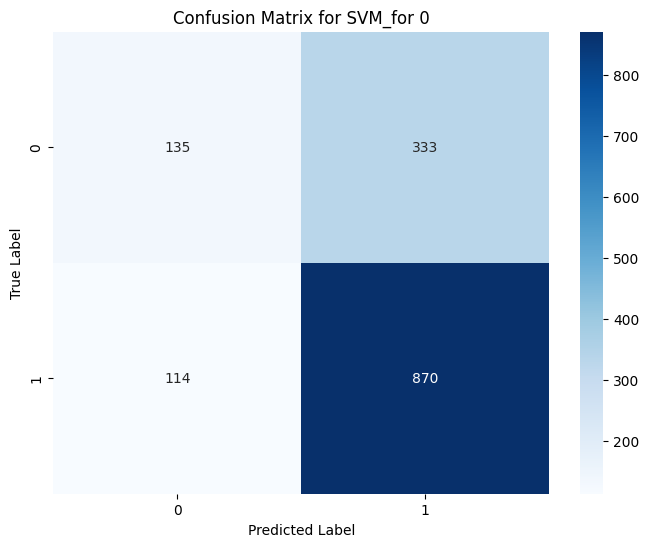

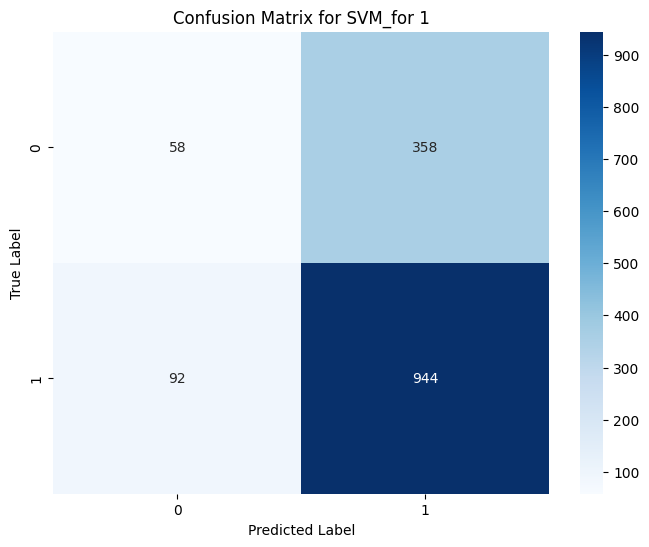

In [105]:
## Try with SVM model to see if it outperforms RandomForest

from sklearn.multioutput import MultiOutputClassifier

# Splitting the datasets into train and test using 20% as test size
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# Creating a base SVM classifier
base_svc = SVC(C = 10, kernel = 'rbf', gamma = 'auto')

# Wrap the SVC model with MultiOutputClassifier
multi_svc = MultiOutputClassifier(base_svc)

# Fit the model to the data
multi_svc.fit(X_train, y_train)


y_test_pred = multi_target_clf.predict(X_test)


y_test_true_target1 = y_test.iloc[:, 0]  # Assuming the first column corresponds to the first target variable
y_test_true_target2 = y_test.iloc[:, 1]  # Assuming the second column corresponds to the second target variable

y_test_pred_target1 = y_test_pred[:, 0]
y_test_pred_target2 = y_test_pred[:, 1]

# Analyzing the model:
# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)


plt.figure(figsize=(6, 4))
plt.bar('SVM', accuracy, color='blue')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for SVM')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.savefig(save_path + "Accuracy_SVM")
plt.show()



# 2. Precision, Recall, and F1 Score
class_report = classification_report(y_test, y_test_pred,zero_division=1)
print("Classification Report:")
print(class_report)

# 3. Confusion Matrix
conf_matrix_target1 = confusion_matrix(y_test_true_target1, y_test_pred_target1)
conf_matrix_target2 = confusion_matrix(y_test_true_target2, y_test_pred_target2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_target1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM_for 0')
plt.savefig(save_path + "Confusion Matrix for SVM_for 0")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_target2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM_for 1')
plt.savefig(save_path + "Confusion Matrix for SVM_for 1")

plt.show()

In [74]:
y_pred = multi_svc.predict(X_test[:10])
y_pred.shape

(10, 2)

In [75]:
y_pred[:10]

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])

In [77]:
y_test[:10]

array([[0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1]])

## Now, Modifying the data such that removing anything that is higher than (mean - standard deviation * 2.5).

In [16]:
df.head()

Age  Average_Reading_time  Reading_time_on_target  \
0    0              0.507344                0.399971   
1    0              0.743741                0.300390   
2    0              0.406157                0.316628   
3    0              0.351900                0.283303   
4    0              0.345011                0.266708   

   Item_t_MemoryTestResp.rt  Item_t_MemoryTestResp.corr  \
0                  0.782505                           1   
1                  0.875974                           1   
2                  1.088317                           1   
3                  0.852112                           1   
4                  1.218718                           1   

   Item_s_MemoryTestResp.rt  Item_s_MemoryTestResp.corr  
0                  0.867199                           1  
1                  2.142522                           0  
2                  0.754723                           1  
3                  1.957806                           0  
4                  3.170142                           1

In [17]:
mean = df["Average_Reading_time"].mean()
sd = df["Average_Reading_time"].std()

In [18]:
value = mean +(2.5* sd)
value

3.8506625966234553

In [19]:
df.shape

(7260, 7)

In [20]:
# Here goes modifying
feature_columns = [col for col in df.columns if col not in ['target1', 'target2']]
def remove_outliers(col):
    mean = np.mean(col)
    SD = np.std(col)
    lower_bound = mean - 2.5 * SD
    upper_bound = mean + 2.5 * SD
    return np.where((col < lower_bound) | (col > upper_bound), np.nan, col)

# Apply the function only to feature columns
df_filtered = df.copy()
df_filtered[feature_columns] = df[feature_columns].apply(remove_outliers)

# If you want to remove the rows with NaN values
df_filtered = df_filtered.dropna()


In [21]:
df_filtered.shape

(7076, 7)

In [22]:
    rf_clf= RandomForestClassifier(n_estimators=99)


    # print(X_train.shape, X_train.dtype)
    # print(y_train.shape, y_train.dtype)
    multi_target_clf = MultiOutputClassifier(estimator = rf_clf)

    # Fitting the Model with X_train and y_train  Note: here y_train is 2D array 
    multi_target_clf.fit(X_train,y_train)
    
    y_pred = multi_target_clf.predict(X_test)
    # print(y_pred)
    # print(f"This is true one: {y_test}")

    # Calculating Cross Validation score to test the performance.
    score = multi_target_clf.score(X_test,y_test)
    scores = cross_val_score(rf_clf, X, y, cv=5)
    print(score)
    print(scores)

0.4696969696969697
[0.46694215 0.4476584  0.434573   0.46694215 0.43939394]


## Checking using different CNN algorithms using PyTorch

In [59]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5808, 5), (1452, 5), (5808, 2), (1452, 2))

Epoch [1/10], Step [100/159], Loss: 0.6704
Epoch [2/10], Step [100/159], Loss: 0.6057
Epoch [3/10], Step [100/159], Loss: 0.6173
Epoch [4/10], Step [100/159], Loss: 0.6637
Epoch [5/10], Step [100/159], Loss: 0.6348
Epoch [6/10], Step [100/159], Loss: 0.6560
Epoch [7/10], Step [100/159], Loss: 0.5893
Epoch [8/10], Step [100/159], Loss: 0.6326
Epoch [9/10], Step [100/159], Loss: 0.5594
Epoch [10/10], Step [100/159], Loss: 0.5955


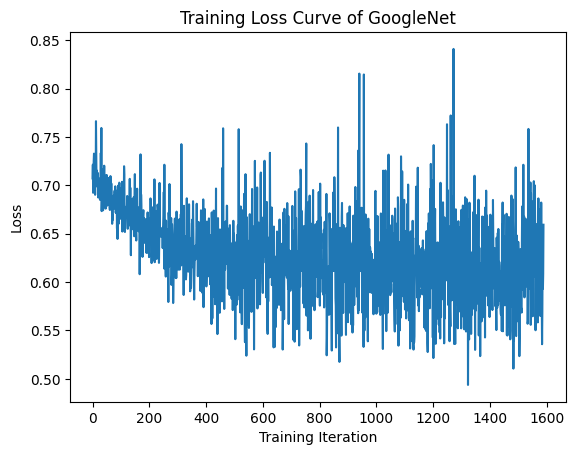

In [65]:
# Define the GoogleNet model
class GoogleNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GoogleNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Define model parameters
input_dim = 5  # Number of input features
output_dim = 2  # Number of output classes

# Instantiate the model
model = GoogleNet(input_dim, output_dim)

# Use Binary Cross Entropy Loss
criterion = nn.BCELoss()

# Use Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adjust learning rate as needed

# Training Loop
num_epochs = 10  # Adjust number of epochs
training_loss = []  # List to store training loss for each epoch

for epoch in range(num_epochs):
    for i, (data, labels) in enumerate(train_loader):
        # Forward Pass
        outputs = model(data)

        # Calculate Loss
        loss = criterion(outputs, labels.float())  # Convert labels to float for BCELoss

        # Backward Pass and Optimizer Step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        training_loss.append(loss.item())  # Append loss of each mini-batch

        if (i+1) % 100 == 0:  # Print loss every 100 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Evaluation Loop (same as before)

# Plot Loss Curve
plt.plot(training_loss)
plt.xlabel("Training Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Curve of GoogleNet")
plt.savefig(save_path + 'Training Loss curve of GoogleNet')

plt.show()

In [53]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = torch.round(outputs)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 1.4104683195592287


Epoch [1/10], Step [100/159], Loss: 0.6744
Epoch [2/10], Step [100/159], Loss: 0.6513
Epoch [3/10], Step [100/159], Loss: 0.6203
Epoch [4/10], Step [100/159], Loss: 0.6126
Epoch [5/10], Step [100/159], Loss: 0.6410
Epoch [6/10], Step [100/159], Loss: 0.5944
Epoch [7/10], Step [100/159], Loss: 0.6082
Epoch [8/10], Step [100/159], Loss: 0.6321
Epoch [9/10], Step [100/159], Loss: 0.6283
Epoch [10/10], Step [100/159], Loss: 0.6514
Test Accuracy: 1.4104683195592287


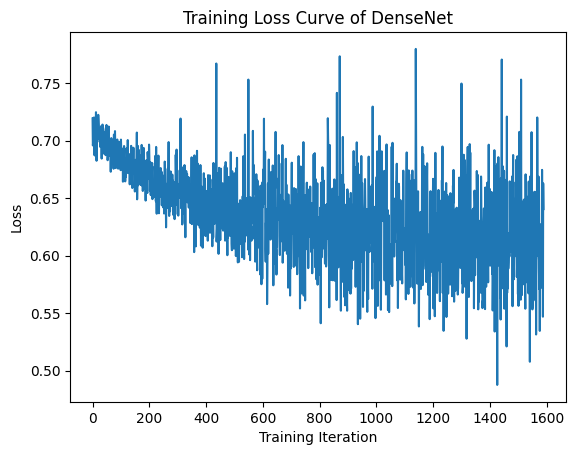

In [64]:
class DenseNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DenseNet, self).__init__()
        # Define the architecture of DenseNet
        # Example architecture:
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Define model parameters
input_dim = 5  # Number of input features
output_dim = 2  # Number of output classes

# Instantiate the model
model = DenseNet(input_dim, output_dim)

# Use Binary Cross Entropy Loss
criterion = nn.BCELoss()

# Use Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adjust learning rate as needed


# Training Loop
num_epochs = 10  # Adjust number of epochs
training_loss = []  # List to store training loss for each epoch

for epoch in range(num_epochs):
    for i, (data, labels) in enumerate(train_loader):
        # Forward Pass
        outputs = model(data)

        # Calculate Loss
        loss = criterion(outputs, labels.float())  # Convert labels to float for BCELoss

        # Backward Pass and Optimizer Step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        training_loss.append(loss.item())  # Append loss of each mini-batch

        if (i+1) % 100 == 0:  # Print loss every 100 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Evaluation Loop (same as before)
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = torch.round(outputs)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy}")

# Plot Loss Curve
plt.plot(training_loss)
plt.xlabel("Training Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Curve of DenseNet")
plt.savefig(save_path + 'Training Loss curve of DenseNet')
plt.show()


Epoch [1/10], Step [100/159], Loss: 0.6418
Epoch [2/10], Step [100/159], Loss: 0.6071
Epoch [3/10], Step [100/159], Loss: 0.6146
Epoch [4/10], Step [100/159], Loss: 0.5801
Epoch [5/10], Step [100/159], Loss: 0.6798
Epoch [6/10], Step [100/159], Loss: 0.6160
Epoch [7/10], Step [100/159], Loss: 0.6168
Epoch [8/10], Step [100/159], Loss: 0.5869
Epoch [9/10], Step [100/159], Loss: 0.6027
Epoch [10/10], Step [100/159], Loss: 0.6733
Test Accuracy: 1.4104683195592287


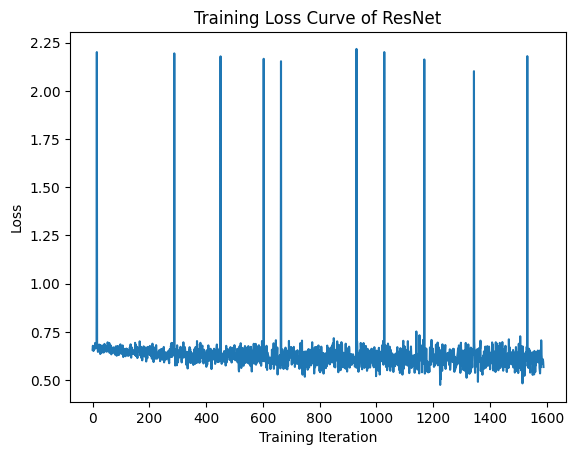

In [63]:
class ResNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ResNet, self).__init__()
        # Define the architecture of ResNet
        # Example architecture:
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Define model parameters
input_dim = 5  # Number of input features
output_dim = 2  # Number of output classes

# Instantiate the model
model = ResNet(input_dim, output_dim)

# Use Binary Cross Entropy Loss
criterion = nn.BCELoss()

# Use Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training Loop
num_epochs = 10  # Adjust number of epochs
training_loss = []  # List to store training loss for each epoch

for epoch in range(num_epochs):
    for i, (data, labels) in enumerate(train_loader):
        # Forward Pass
        outputs = model(data)

        # Calculate Loss
        loss = criterion(outputs, labels.float())  # Convert labels to float for BCELoss

        # Backward Pass and Optimizer Step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        training_loss.append(loss.item())  # Append loss of each mini-batch

        if (i+1) % 100 == 0:  # Print loss every 100 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Evaluation Loop (same as before)
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = torch.round(outputs)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy}")

# Plot Loss Curve
plt.plot(training_loss)
plt.xlabel("Training Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Curve of ResNet")
plt.savefig(save_path + 'Training Loss curve of ResNet')

plt.show()


Epoch [1/10], Step [100/159], Loss: 0.6609
Epoch [2/10], Step [100/159], Loss: 0.6429
Epoch [3/10], Step [100/159], Loss: 0.6130
Epoch [4/10], Step [100/159], Loss: 0.6105
Epoch [5/10], Step [100/159], Loss: 0.6297
Epoch [6/10], Step [100/159], Loss: 0.6472
Epoch [7/10], Step [100/159], Loss: 0.6384
Epoch [8/10], Step [100/159], Loss: 0.5932
Epoch [9/10], Step [100/159], Loss: 0.6184
Epoch [10/10], Step [100/159], Loss: 0.5829
Test Accuracy: 1.4178145087235996


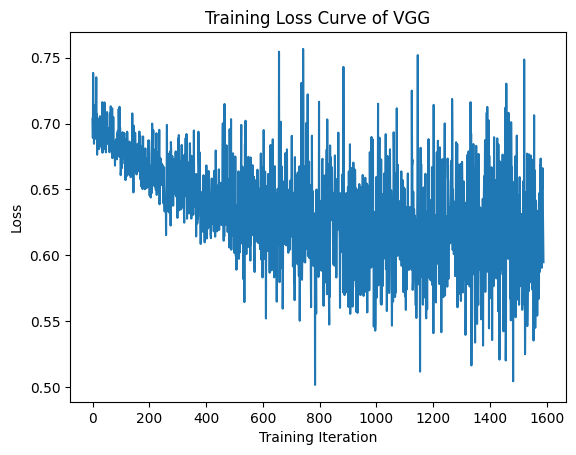

In [26]:
# Define the VGG model
class VGG(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(VGG, self).__init__()
        # Define the architecture of VGG
        # Example architecture:
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Define model parameters
input_dim = 5  # Number of input features
output_dim = 2  # Number of output classes

# Instantiate the model
model = VGG(input_dim, output_dim)

# Use Binary Cross Entropy Loss
criterion = nn.BCELoss()

# Use Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adjust learning rate as needed

# Training Loop
num_epochs = 10  # Adjust number of epochs
training_loss = []  # List to store training loss for each epoch

for epoch in range(num_epochs):
    for i, (data, labels) in enumerate(train_loader):
        # Forward Pass
        outputs = model(data)

        # Calculate Loss
        loss = criterion(outputs, labels.float())  # Convert labels to float for BCELoss

        # Backward Pass and Optimizer Step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        training_loss.append(loss.item())  # Append loss of each mini-batch

        if (i+1) % 100 == 0:  # Print loss every 100 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Evaluation Loop (same as before)
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = torch.round(outputs)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy}")

# Plot Loss Curve
plt.plot(training_loss)
plt.xlabel("Training Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Curve of VGG")
plt.savefig(save_path + 'Training Loss curve of VGG')
plt.show()




In [22]:
# Since the accuracy score is higher than 100%. Let's debug it:
# 1)  Print labels and predicted outputs
for inputs, labels in test_loader:
    outputs = model(inputs)
    predicted = torch.round(outputs)
    print("True labels:", labels)
    print("Predicted outputs:", predicted)


True labels: tensor([[1., 0.],
        [1., 1.],
        [1., 1.],
        [0., 1.],
        [1., 1.],
        [1., 1.],
        [1., 0.],
        [0., 1.],
        [0., 0.],
        [1., 1.],
        [0., 1.],
        [1., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [0., 1.],
        [1., 1.],
        [1., 1.],
        [0., 0.],
        [1., 1.],
        [0., 1.],
        [1., 1.],
        [0., 1.],
        [1., 1.]])
Predicted outputs: tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 

In [23]:
# 2) checking if data is properly scaled:
# Check the format of predicted outputs
for inputs, labels in test_loader:
    outputs = model(inputs)
    predicted = torch.round(outputs)
    print("Predicted outputs:", predicted)


Predicted outputs: tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]], grad_fn=<RoundBackward0>)
Predicted outputs: tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],

In [24]:
# 3) Data loading: checking if the data is loaded correctly
for inputs, labels in test_loader:
    print("Sample input data:", inputs)
    print("Sample labels:", labels)
    break  # Stop after printing a few samples

Sample input data: tensor([[ 1.0954e+00,  3.0013e-03,  5.0316e-01,  4.9881e-04, -3.0258e-01],
        [-9.1287e-01, -7.7706e-02, -2.0956e-01, -2.3045e-01, -3.0257e-01],
        [ 1.0954e+00,  8.8106e-02,  8.0457e-01,  1.1263e+00, -3.6600e-01],
        [-9.1287e-01, -1.3346e-01, -6.8589e-01,  9.9186e-02, -1.8298e-01],
        [-9.1287e-01, -1.0459e-01, -4.4886e-01, -2.2492e-01, -2.9092e-01],
        [-9.1287e-01, -1.9043e-01, -2.1062e-01, -3.5079e-01, -7.0749e-02],
        [ 1.0954e+00, -1.5040e-03,  2.6674e-01,  1.0063e-01, -8.2323e-02],
        [ 1.0954e+00, -1.1527e-01,  3.8676e-01,  4.7575e-04,  1.0732e+00],
        [ 1.0954e+00, -1.1137e-01, -8.8638e-02, -1.8978e-01, -2.9403e-01],
        [-9.1287e-01, -9.2910e-02, -6.2677e-01, -8.5055e-02, -1.8711e-01],
        [-9.1287e-01,  8.3200e-02,  2.6585e-01, -2.0039e-01, -3.1238e-01],
        [ 1.0954e+00,  1.6230e-01,  3.8500e+00, -1.8727e-01, -3.1044e-01],
        [-9.1287e-01, -1.8994e-01, -7.4654e-01, -3.6103e-01, -2.3234e-01],
      

In [27]:
# 4)
print("Is model in evaluation mode?", model.training)

Is model in evaluation mode? False
